<a href="https://colab.research.google.com/github/picazio/FinanceWithPythonDC/blob/master/Financial_Analysis_in_Python_Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taking Out a Mortgage Loan**

You're expecting a child soon, and its time to start looking for a home.

You're currently living out of an apartment in New York City, but your blossoming career as a Data Scientist has allowed you to save up a sizable sum and purchase a home in neighboring Hoboken, New Jersey.

You have decided to purchase a beautiful brownstone home in the $800,000 range. While you do have a considerable amount of cash on hand, you don't have enough to purchase the entire home outright, which means you will have to take the remaining balance out as a mortgage loan. From the sound of it, you'll have to put about 20% down up-front to a mortgage loan of that size.

This up-front payment is known as a down payment.

* Set home_value equal to 800000.
* Set the down_payment_percent equal to 20%.
* Calculate the value of down_payment.
* Calculate the value of mortgage_loan.

In [5]:
import numpy as np

# Set the value of the home you are looking to buy
home_value = 800000

# What percentage are you paying up-front?
down_payment_percent = 0.20

# Calculate the dollar value of the down payment
down_payment = home_value*0.20
print("Initial Down Payment: " + str(down_payment))

# Calculate the value of the mortgage loan required after the down payment
mortgage_loan = home_value-down_payment
print("Mortgage Loan: " + str(mortgage_loan))

Initial Down Payment: 160000.0
Mortgage Loan: 640000.0


**Calculating the Monthly Mortgage Payment**

In order to make sure you can afford the home, you will have to calculate the monthly mortgage payment you will have to make on a loan that size.

Now, since you will be paying a monthly mortgage, you will have to convert each of the parameters into their monthly equivalents. Be careful when adjusting the interest rate, which is compounding!

In order to calculate the monthly mortgage payment, you will use the numpy function .pmt(rate, nper, pv) where:

* rate = The periodic (monthly) interest rate
* nper = The number of payment periods (months) in the lifespan of the mortgage loan
* pv = The total value of the mortgage loan
You have been given a 30-year mortgage loan quote for your desired amount at 3.75%. The value of the mortgage loan is available as mortgage_loan.

The annual mortgage rate is available as mortgage_rate

* Derive the equivalent monthly mortgage interest rate from the quoted annual mortgage_rate (Hint: You cannot simply divide by 12).
* Derive the number of mortgage_payment_periods (months) in the lifespan of the 30-year loan.
* Calculate the value of your monthly mortgage payment using np.pmt().

In [6]:
import numpy as np

#Annual mortgage rate
mortgage_rate=0.0375

# Derive the equivalent monthly mortgage rate from the annual rate
mortgage_rate_periodic = ((1+mortgage_rate)**(1./12.))-1

# How many monthly payment periods will there be over 30 years?
mortgage_payment_periods = 12*30

# Calculate the monthly mortgage payment (multiply by -1 to keep it positive)
periodic_mortgage_payment = -1*np.pmt(mortgage_rate_periodic, mortgage_payment_periods, mortgage_loan)
print("Monthly Mortgage Payment: " + str(round(periodic_mortgage_payment, 2)))

Monthly Mortgage Payment: 2941.13


**Calculating Interest and Principal Payments**

Due to the size of the mortgage loan, you begin the mortgage in the initial period by paying mostly interest and retaining very little principal, or equity that goes towards the ownership of your home.

This means that if you were to stop paying your mortgage and sell your home after only a few years, the bank would actually own most of the home because what you paid was mostly interest, and very little principal.

mortgage_loan, mortgage_rate_periodic, and periodic_mortgage_payment from the third exercise are available for use.


* Calculate the amount of the first loan payment that will go towards the mortgage interest based on the mortgage rate.
* Calculate the remaining amount of the first loan payment that will go towards the mortgage principal.

In [7]:
# Calculate the amount of the first loan payment that will go towards interest
initial_interest_payment = mortgage_loan*mortgage_rate_periodic
print("Initial Interest Payment: " + str(round(initial_interest_payment, 2)))

# Calculate the amount of the first loan payment that will go towards principal
initial_principal_payment = periodic_mortgage_payment-initial_interest_payment
print("Initial Principal Payment: " + str(round(initial_principal_payment, 2)))

Initial Interest Payment: 1966.43
Initial Principal Payment: 974.7


**Simulating Periodic Payments (I)**

You have all the tools you'll need to simulate the mortgage payments over time.

Every time a mortgage payment is made, the following payment will have a slightly lower percentage, which is used to pay off interest. This means that more of the remainder will go towards the portion of the home that you own instead of the bank. This is important to determine how much you will gain from selling the home before paying off your mortgage, or to determine when your mortgage is underwater. But more on that later.

You will now write a simple program to calculate the interest and mortgage portions of each payment over time.

The mortgage_loan, mortgage_rate_periodic, and periodic_mortgage_payment variables from the third exercise are available for use.

The principal_remaining variable is initialized as an array of 0's with length equal to the number of payment periods.

* Set the previous_principal_remaining for the first period, i.e. when (i == 0), equal to the mortgage loan value.
* Set the previous_principal_remaining for all other periods equal to the remaining principal from the previous period ([i - 1]).
* Calculate the interest payment (the product of previous principal remaining and the periodic mortgage rate) and principal payment (the difference between periodic mortgage payment and the interest paid) for each period.


In [24]:
principal_remaining=np.zeros(mortgage_payment_periods)

def print_payments(i, interest_payment, principal_payment, principal_remaining) :
  if i<5 :
    print("Period "+str(i)+": Interest Paid: "+str(interest_payment)+" | Principal Paid: "+str(principal_payment)+" | Remaining Balance: "+str(principal_remaining[i]))

# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest and principal payments
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment-interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the principal remaining values in an array
    principal_remaining[i] = previous_principal_remaining - principal_payment
    
    # Print the payments for the first few periods
    print_payments(i, interest_payment, principal_payment, principal_remaining)

Period 0: Interest Paid: 1966.43 | Principal Paid: 974.7 | Remaining Balance: 639025.3
Period 1: Interest Paid: 1963.43 | Principal Paid: 977.7 | Remaining Balance: 638047.6000000001
Period 2: Interest Paid: 1960.43 | Principal Paid: 980.7 | Remaining Balance: 637066.9000000001
Period 3: Interest Paid: 1957.41 | Principal Paid: 983.72 | Remaining Balance: 636083.1800000002
Period 4: Interest Paid: 1954.39 | Principal Paid: 986.74 | Remaining Balance: 635096.4400000002


**Simulating Periodic Payments (II)**

You have decided to extend your program from the previous exercise to store the principal and interest payments made at each period, and to plot the results instead of simply printing them.

For this example, the plotting code is already done, so you just need to finish the logic inside the for loop and the initialization of the variables which will be updated at each iteration.



* Simply store the interest_paid and principal_paid for each time period.
* Calculate the principal_remaining for each time period based on the principal payment and the remaining principal.
* Run the provided code to plot the monthly Interest vs Principal payments.


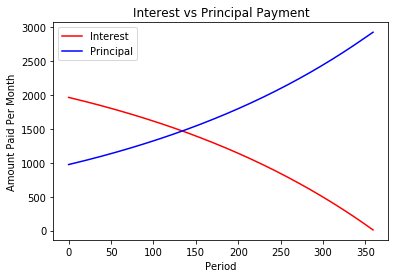

In [25]:
interest_paid=np.zeros(mortgage_payment_periods)
principal_paid=np.zeros(mortgage_payment_periods)

for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest based on the previous principal
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the historical values
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining-principal_payment

import matplotlib.pyplot as plt
# Plot the interest vs principal
inter_p = interest_paid.copy()
prin_p = principal_paid.copy()
interest_plot, = plt.plot(inter_p, color="red", label='Interest')
principal_plot, = plt.plot(prin_p, color="blue", label='Principal')
plt.legend(handles=[interest_plot, principal_plot], loc=2)
plt.xlabel("Period")
plt.ylabel("Amount Paid Per Month")
plt.title("Interest vs Principal Payment")
plt.show()

**Cumulative Payments and Home Equity**

You are faithfully paying your mortgage each month, but it's difficult to tell how much of the house you actually own and how much interest you have paid in total over the years.

Use np.cumsum() to add up all the interest payments and also to add up all the principal payments over time to see how your ownership changes over time.

Recall that np.cumsum() performs a cumulative sum over time. Return a series of iterative sums instead of just a single number.

principal_paid, interest_paid, home_value and down_payment_percent from the previous exercise are available.

* Calculate your cumulative_home_equity over time using np.cumsum() on the principal paid.
* Repeat the process with cumulative_interest_paid.
* Calculate your percentage home equity over time (don't forget to add the down payment!).

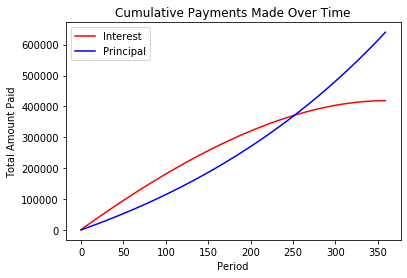

In [26]:
import numpy as np

# Calculate the cumulative home equity (principal) over time
cumulative_home_equity = np.cumsum(principal_paid)

# Calculate the cumulative interest paid over time
cumulative_interest_paid = np.cumsum(interest_paid)

# Calculate your percentage home equity over time
cumulative_percent_owned = down_payment_percent + (cumulative_home_equity/home_value)
#print(cumulative_percent_owned)

# Plot the cumulative interest paid vs equity accumulated
interest_plot, = plt.plot(cumulative_interest_paid, color='red', label='Interest')
principal_plot, = plt.plot(cumulative_home_equity, color='blue', label='Principal')
plt.legend(handles=[interest_plot, principal_plot], loc=2)
plt.xlabel("Period")
plt.ylabel("Total Amount Paid")
plt.title("Cumulative Payments Made Over Time")
plt.show()

**Rising Housing Prices**

Home values have been rising steadily each year, and this is a rather large investment for you.

Calculate your home equity value over time given a steady growth rate of 0.25% per month. A repeated array of this growth rate (with a length equal to the number of mortgage payment periods) is already stored for you in an object called growth_array.

The home_value and cumulative_percent_owned variables from the previous exercise are available.

* Calculate the cumulative growth over time using np.cumprod() and growth_array.
* Forecast the home value over time using cumulative growth array and the initial home_value .
* Forecast the portion of home equity value owned over time given the home_value_forecast and cumulative_percent_owned.
* Run the provided code to see a plot of Home Value vs. Home Equity over time.

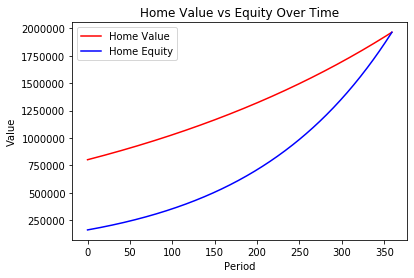

In [17]:
growth_array=np.zeros(mortgage_payment_periods)
growth_array=growth_array+0.0025
#print(growth_array)

# Calculate the cumulative growth over time
cumulative_growth_forecast = np.cumprod(1+growth_array)

# Forecast the home value over time
home_value_forecast = home_value*cumulative_growth_forecast

# Forecast the home equity value owned over time
cumulative_home_value_owned = cumulative_percent_owned*home_value_forecast

# Plot the home value vs equity accumulated
homevalue_plot, = plt.plot(home_value_forecast, color='red',label='Home Value')
homeequity_plot, = plt.plot(cumulative_home_value_owned, color='blue',label='Home Equity')
plt.legend(handles=[homevalue_plot, homeequity_plot], loc=2)
plt.xlabel('Period')
plt.ylabel('Value')
plt.title('Home Value vs Equity Over Time')
plt.show()

**Falling Housing Prices and Underwater Mortgages**

Unfortunately, you are also well aware that home prices don't always rise.

An underwater mortgage is when the remaining amount you owe on your mortgage is actually higher than the value of the house itself.

In this exercise, you will calculate the worst case scenario where home prices drop steadily at the rate of 0.45% per month. To speed things up, the cumulative drop in home prices has already been forecasted and stored for you in a variable called cumulative_decline_forecast, which is an array of multiplicative discount factors compared to today's price - no need to add 1 to the rate array.

The outstanding principal on the mortgage is available as principal_remaining.

* Forecast the home value over time using a simple operation between the cumulative_decline_forecast array and the initial home_value.
* Calculate where the mortgage is underwater at each time period, storing an array of boolean values when the condition is true or false.
* Run the existing code to plot the home value vs. principal remaining over time.

True     180
False    180
dtype: int64


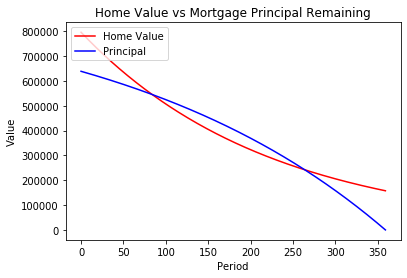

In [23]:
decline_array=np.zeros(mortgage_payment_periods)-0.0045
#print(decline_array)

import pandas as pd

# Cumulative drop in home value over time as a ratio
cumulative_decline_forecast = np.cumprod(1+decline_array)

# Forecast the home value over time
home_value_forecast = home_value*cumulative_decline_forecast

# Find all periods where your mortgage is underwater
underwater = principal_remaining>home_value_forecast
print(pd.value_counts(underwater))

# Plot the home value vs principal remaining
plt.plot(home_value_forecast, color='red')
plt.plot(principal_remaining, color='blue')
plt.legend(handles=[homevalue_plot, principal_plot], loc=2)
plt.xlabel('Period')
plt.ylabel('Value')
plt.title('Home Value vs Mortgage Principal Remaining')
plt.show()